<a href="https://colab.research.google.com/github/Lesiazhou/QM2/blob/main/Salinity%2C_Precipitation%2C_Water_Inflow_vs_NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salinity vs NDVI**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

from google.colab import files
uploaded = files.upload()

In [ ]:
df=pd.read_csv('environmental factors real.csv')
df.head(10)

,Unnamed: 0,Year,Salinity,NDVI,Temperature,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,1980,16.8,0.17480,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1981,17.7,0.17307,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1982,18.8,0.17134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1983,20.3,0.16961,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1984,21.9,0.16788,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1985,22.9,0.16615,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1986,22.9,0.16442,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1987,23.9,0.16269,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1988,25.0,0.16096,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1989,28.0,0.15923,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
summary=df.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,30.0,1994.50,8.80,1980.00,1987.25,1994.50,2001.75,2009.00
salinity (g/l),30.0,47.82,27.93,16.80,24.17,36.50,67.15,102.00
NDVI,30.0,0.15,0.02,0.12,0.14,0.15,0.16,0.17
Temperature,9.0,25.26,1.74,22.70,24.10,25.60,26.60,27.80
Unnamed: 5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'Year', 'Salinity ', 'NDVI', 'Temperature ', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')


In [ ]:
# Build the model using the updated df
Salinity = df['Salinity ']
model = ols('NDVI ~ Salinity ', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     275.7
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           5.02e-16
Time:                        15:08:17   Log-Likelihood:                 119.23
No. Observations:                  30   AIC:                            -234.5
Df Residuals:                      28   BIC:                            -231.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1746      0.002    101.176      0.0

#REGRESSIONN

NDVI = Intercept + (Salinity * Coefficient)

In [ ]:
#NDVI = 0.1746 + (-0.0005) x Salinity
#Negative relaitonship
#he coefficient is negative, indicating that as Salinity increases, NDVI tends to decrease.
#P values says zero but could report it as p < 0.001" to avoid any misinterpretations.


In [ ]:
#A version with different units as the number are extremely low for the original unit

In [ ]:
df['Scaled_Salinity'] = df['Salinity '] / 1000  # Divide by 1000
model = ols('NDVI ~ Scaled_Salinity', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     275.7
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           5.02e-16
Time:                        15:12:14   Log-Likelihood:                 119.23
No. Observations:                  30   AIC:                            -234.5
Df Residuals:                      28   BIC:                            -231.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1746      0.002    1

# **Precipitation vs NDVI**

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

from google.colab import files
uploaded = files.upload()

Saving NDVI_and_Precipitation_Data.csv to NDVI_and_Precipitation_Data.csv


In [20]:
df_precipitation=pd.read_csv('NDVI_and_Precipitation_Data.csv')
df_precipitation = df_precipitation.iloc[2:].reset_index(drop=True)
df_precipitation.head(10)

,Unnamed: 0,Year,NDVI,Precipitation (mm/yr)
0,2,2002,0.137296,35
1,3,2003,0.141943,40
2,4,2004,0.124818,50
3,5,2005,0.104615,45
4,6,2006,0.094313,42
5,7,2007,0.106164,44
6,8,2008,0.102562,46
7,9,2009,0.092858,45
8,10,2010,0.108576,43
9,11,2011,0.100783,40


In [21]:
summary=df_precipitation.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14.0,8.50,4.18,2.00,5.25,8.50,11.75,15.00
Year,14.0,2008.50,4.18,2002.00,2005.25,2008.50,2011.75,2015.00
NDVI,14.0,0.12,0.02,0.09,0.10,0.11,0.13,0.14
Precipitation (mm/yr),14.0,47.00,8.92,35.00,42.25,45.00,49.00,70.00


In [22]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

In [23]:
precipitaion = df_precipitation['Precipitation (mm/yr)']
model = ols('NDVI ~ precipitaion', data=df_precipitation).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9597
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.347
Time:                        15:08:32   Log-Likelihood:                 37.340
No. Observations:                  14   AIC:                            -70.68
Df Residuals:                      12   BIC:                            -69.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0896      0.027      3.324   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)


# **Results: p>0.05, there is no significant relation between Precipitation and NDVI **

# **Water inflow from two rivers vs NDVI**

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

from google.colab import files
uploaded = files.upload()

Saving Water_Inflow_2000-2015_.csv to Water_Inflow_2000-2015_ (1).csv


In [27]:
df_waterinflow=pd.read_csv('Water_Inflow_2000-2015_.csv')
df_waterinflow = df_waterinflow.iloc[2:].reset_index(drop=True)
df_waterinflow.head(10)

,Year,Amudarya_NonGrowing_Actual,Syrdarya_NonGrowing_Actual,Syrdarya_Growing_Actual,Amudarya_Growing_Actual
0,2002,3455,4137.8,3622.8,3781.0
1,2003,3000,6079.9,4035.3,3145.0
2,2004,3356,6105.6,4393.7,7189.0
3,2005,4518,6265.5,4035.7,5721.0
4,2006,1167,3453.9,2899.0,3473.0
5,2007,1230,4611.7,2595.9,1808.0
6,2008,144,1494.0,1310.0,1866.0
7,2009,1816,2775.0,2312.0,2100.0
8,2010,2483,5183.0,4260.0,2444.0
9,2011,1048,2689.7,1573.0,1802.0


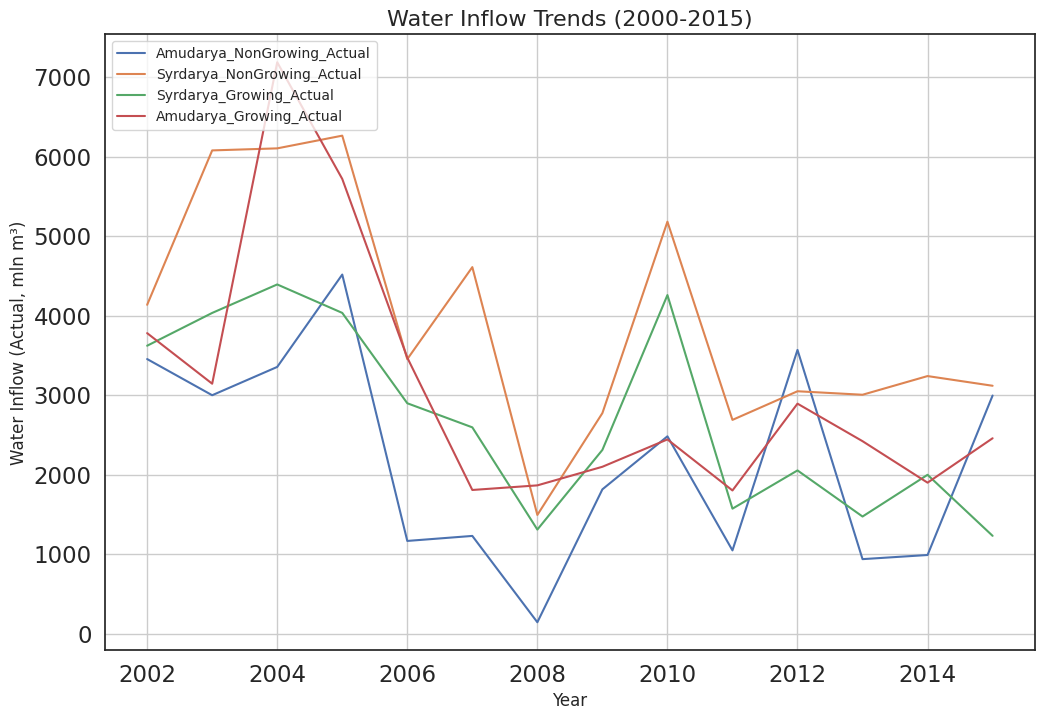

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for column in df_waterinflow.columns[1:]:
    plt.plot(df_waterinflow["Year"], df_waterinflow[column], label=column)

plt.title("Water Inflow Trends (2000-2015)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Water Inflow (Actual, mln m³)", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True)
plt.show()

NDVI = β0 + β1 * Amudarya_NonGrowing_Season + β2 * Amudarya_NonGrowing_Season + β3 * Syrdarya_Growing_Season + β4 * Amudarya_Growing_Actual + ε

*   NDVI: The dependent variable
*   Amudarya_NonGrowing_Season: The first predictor variable
*   yrdarya_Growing_Season: The second predictor variable
*   Amudarya_Growing_Actua:  The third predictor variable
*   mudarya_Growing_Actual: The forth predictor variable


In [30]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
Amudarya_NonGrowing_Season = df_waterinflow['Amudarya_NonGrowing_Actual']
Amudarya_Growing_Season = df_waterinflow['Amudarya_Growing_Actual']
Syrdarya_NonGrowing_Season = df_waterinflow['Syrdarya_NonGrowing_Actual']
Syrdarya_Growing_Season = df_waterinflow['Syrdarya_Growing_Actual']
NDVI=df_precipitation['NDVI']

model = ols('NDVI ~ Amudarya_NonGrowing_Season + Amudarya_Growing_Season + Syrdarya_NonGrowing_Season + Syrdarya_Growing_Season ', data=df_waterinflow).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                 -0.106
Method:                 Least Squares   F-statistic:                    0.6882
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.618
Time:                        15:10:09   Log-Likelihood:                 38.669
No. Observations:                  14   AIC:                            -67.34
Df Residuals:                       9   BIC:                            -64.14
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)
